In [1]:
import pandas as pd
import numpy as np
import sys
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
import json
from fim import apriori, fpgrowth, eclat
import matplotlib.pyplot as plt
import time

In [2]:
# Source
# https://www.kaggle.com/puneetbhaya/online-retail
# online_retail

# Data preparation

In [3]:
dataset = pd.read_csv('./online_retail/Online Retail.csv', usecols=['InvoiceNo','Description'])
dataset

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS
541905,581587,CHILDREN'S APRON DOLLY GIRL
541906,581587,CHILDRENS CUTLERY DOLLY GIRL
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE


In [4]:
dataset = dataset.groupby(['InvoiceNo'])['Description'].apply(list)

In [5]:
transactions=[]
for item in dataset.values:
    transactions.append(list(set(item)))

In [6]:
transactions[0:4]

[['GLASS STAR FROSTED T-LIGHT HOLDER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'WHITE HANGING HEART T-LIGHT HOLDER',
  'SET 7 BABUSHKA NESTING BOXES',
  'WHITE METAL LANTERN',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'CREAM CUPID HEARTS COAT HANGER'],
 ['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK'],
 ['FELTCRAFT PRINCESS CHARLOTTE DOLL',
  "POPPY'S PLAYHOUSE KITCHEN",
  'BOX OF VINTAGE JIGSAW BLOCKS ',
  'RECIPE BOX WITH METAL HEART',
  'ASSORTED COLOUR BIRD ORNAMENT',
  'LOVE BUILDING BLOCK WORD',
  'IVORY KNITTED MUG COSY ',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  "POPPY'S PLAYHOUSE BEDROOM ",
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'HOME BUILDING BLOCK WORD',
  'DOORMAT NEW ENGLAND'],
 ['BLUE COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION']]

In [7]:
len(transactions)

25900

## Done

In [8]:
pd.set_option("max_colwidth", 150)

In [9]:
support=1.0
confidence=70 
target='rules'
zmin=2 # антицидент+консеквент 
zmax=7 # антицидент+консеквент

# Apriori

In [10]:
start=time.perf_counter()
fi_apriori = apriori(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

0.12238184899979387


In [11]:
df_apriori = pd.DataFrame.from_records(fi_apriori).sort_values(by=[2],ascending=False).reset_index(drop=True)
df_apriori

,0,1,2
0,ROSES REGENCY TEACUP AND SAUCER,"(GREEN REGENCY TEACUP AND SAUCER,)",784
1,GREEN REGENCY TEACUP AND SAUCER,"(ROSES REGENCY TEACUP AND SAUCER ,)",784
2,GREEN REGENCY TEACUP AND SAUCER,"(PINK REGENCY TEACUP AND SAUCER,)",644
3,ROSES REGENCY TEACUP AND SAUCER,"(PINK REGENCY TEACUP AND SAUCER,)",614
4,GARDENERS KNEELING PAD KEEP CALM,"(GARDENERS KNEELING PAD CUP OF TEA ,)",549
...,...,...,...
246,CHARLOTTE BAG SUKI DESIGN,"(LUNCH BAG CARS BLUE, WOODLAND CHARLOTTE BAG)",187
247,JUMBO SHOPPER VINTAGE RED PAISLEY,"(JUMBO BAG WOODLAND ANIMALS, JUMBO STORAGE BAG SUKI, DOTCOM POSTAGE)",186
248,LUNCH BAG RED RETROSPOT,"(LUNCH BAG SUKI DESIGN , LUNCH BAG CARS BLUE, LUNCH BAG SPACEBOY DESIGN )",185
249,WOODLAND CHARLOTTE BAG,"(CHARLOTTE BAG APPLES DESIGN, STRAWBERRY CHARLOTTE BAG)",185


# FP-Growth

In [12]:
start=time.perf_counter()
fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

0.1518241779995151


In [13]:
df_fpgrowth = pd.DataFrame.from_records(fi_fpgrowth).sort_values(by=[2],ascending=False).reset_index(drop=True)
df_fpgrowth

,0,1,2
0,ROSES REGENCY TEACUP AND SAUCER,"(GREEN REGENCY TEACUP AND SAUCER,)",784
1,GREEN REGENCY TEACUP AND SAUCER,"(ROSES REGENCY TEACUP AND SAUCER ,)",784
2,GREEN REGENCY TEACUP AND SAUCER,"(PINK REGENCY TEACUP AND SAUCER,)",644
3,ROSES REGENCY TEACUP AND SAUCER,"(PINK REGENCY TEACUP AND SAUCER,)",614
4,PINK REGENCY TEACUP AND SAUCER,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGENCY TEACUP AND SAUCER)",549
...,...,...,...
246,CHARLOTTE BAG SUKI DESIGN,"(LUNCH BAG CARS BLUE, WOODLAND CHARLOTTE BAG)",187
247,JUMBO SHOPPER VINTAGE RED PAISLEY,"(JUMBO BAG WOODLAND ANIMALS, JUMBO STORAGE BAG SUKI, DOTCOM POSTAGE)",186
248,LUNCH BAG RED RETROSPOT,"(LUNCH BAG SUKI DESIGN , LUNCH BAG CARS BLUE, LUNCH BAG SPACEBOY DESIGN )",185
249,WOODLAND CHARLOTTE BAG,"(CHARLOTTE BAG APPLES DESIGN, STRAWBERRY CHARLOTTE BAG)",185


# ECLAT

In [14]:
start=time.perf_counter()
fi_eclat = eclat(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

0.14809858399894438


In [15]:
df_fi_eclat = pd.DataFrame.from_records(fi_eclat).sort_values(by=[2],ascending=False).reset_index(drop=True)
df_fi_eclat

,0,1,2
0,ROSES REGENCY TEACUP AND SAUCER,"(GREEN REGENCY TEACUP AND SAUCER,)",784
1,GREEN REGENCY TEACUP AND SAUCER,"(ROSES REGENCY TEACUP AND SAUCER ,)",784
2,GREEN REGENCY TEACUP AND SAUCER,"(PINK REGENCY TEACUP AND SAUCER,)",644
3,ROSES REGENCY TEACUP AND SAUCER,"(PINK REGENCY TEACUP AND SAUCER,)",614
4,GARDENERS KNEELING PAD KEEP CALM,"(GARDENERS KNEELING PAD CUP OF TEA ,)",549
...,...,...,...
246,CHARLOTTE BAG SUKI DESIGN,"(WOODLAND CHARLOTTE BAG, LUNCH BAG CARS BLUE)",187
247,JUMBO SHOPPER VINTAGE RED PAISLEY,"(DOTCOM POSTAGE, JUMBO BAG WOODLAND ANIMALS, JUMBO STORAGE BAG SUKI)",186
248,LUNCH BAG RED RETROSPOT,"(LUNCH BAG SUKI DESIGN , LUNCH BAG SPACEBOY DESIGN , LUNCH BAG CARS BLUE)",185
249,WOODLAND CHARLOTTE BAG,"(CHARLOTTE BAG APPLES DESIGN, STRAWBERRY CHARLOTTE BAG)",185


In [16]:
df_fi_eclat.values.tolist()[1]

['GREEN REGENCY TEACUP AND SAUCER', ('ROSES REGENCY TEACUP AND SAUCER ',), 784]

## Association rules

In [17]:
df_fi_eclat.values.tolist()

[['ROSES REGENCY TEACUP AND SAUCER ',
  ('GREEN REGENCY TEACUP AND SAUCER',),
  784],
 ['GREEN REGENCY TEACUP AND SAUCER',
  ('ROSES REGENCY TEACUP AND SAUCER ',),
  784],
 ['GREEN REGENCY TEACUP AND SAUCER', ('PINK REGENCY TEACUP AND SAUCER',), 644],
 ['ROSES REGENCY TEACUP AND SAUCER ',
  ('PINK REGENCY TEACUP AND SAUCER',),
  614],
 ['GARDENERS KNEELING PAD KEEP CALM ',
  ('GARDENERS KNEELING PAD CUP OF TEA ',),
  549],
 ['PINK REGENCY TEACUP AND SAUCER',
  ('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  549],
 ['ROSES REGENCY TEACUP AND SAUCER ',
  ('PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'),
  549],
 ['GREEN REGENCY TEACUP AND SAUCER',
  ('PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  549],
 ['JUMBO BAG RED RETROSPOT',
  ('JUMBO STORAGE BAG SUKI', 'JUMBO BAG PINK POLKADOT'),
  416],
 ['ROSES REGENCY TEACUP AND SAUCER ',
  ('GREEN REGENCY TEACUP AND SAUCER', 'REGENCY CAKESTAND 3 TIER'),
  412],
 ['GREEN 

In [18]:
df_fi_eclat.values.tolist()[0]

['ROSES REGENCY TEACUP AND SAUCER ', ('GREEN REGENCY TEACUP AND SAUCER',), 784]

In [19]:
df_fi_eclat.values.tolist()[-1]

['JUMBO BAG RED RETROSPOT',
 ('JUMBO  BAG BAROQUE BLACK WHITE', 'LUNCH BAG RED RETROSPOT'),
 183]

# Фиксированный набор данных, изменяемый порог достоверности

In [20]:
confs = [10,20,30,40,50,60,70,80,90,100]

a = []
fp = []
e = []

fi_fpgrowth=[]

fr_it_set_size = []          # 2
fi_it_set_max_len = []       # 3
num_of_unique_fr_it_set = [] # 4

In [21]:
for conf in confs:
    start_a = time.perf_counter()
    fi_apriori = apriori(tracts=transactions, target=target, supp=support, conf=conf, zmin=zmin)
    end_a = time.perf_counter()
    
    start_fp = time.perf_counter()
    fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=support, conf=conf, zmin=zmin)
    end_fp = time.perf_counter()
    
    #### 2.
    
    fr_it_set_size.append(len(fi_fpgrowth))
    
    #### 3
    
    size=[0,]
    for i in range(len(fi_fpgrowth)):
        size.append( len(fi_fpgrowth[i][0])+len(fi_fpgrowth[i][0]) )
    fi_it_set_max_len.append(max(size))
    
    #### 4
    
    fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=support, conf=conf, zmin=zmin, zmax=7) 
    num_of_unique_fr_it_set.append(len(fi_fpgrowth))
    
    ####
    
    start_e = time.perf_counter()
    fi_e = eclat(tracts=transactions, target=target, supp=support, conf=conf, zmin=zmin)
    end_e = time.perf_counter()
    
    a.append(end_a-start_a)
    fp.append(end_fp-start_fp)
    e.append(end_e-start_e)

### 1. Сравнение быстродействия алгоритмов 

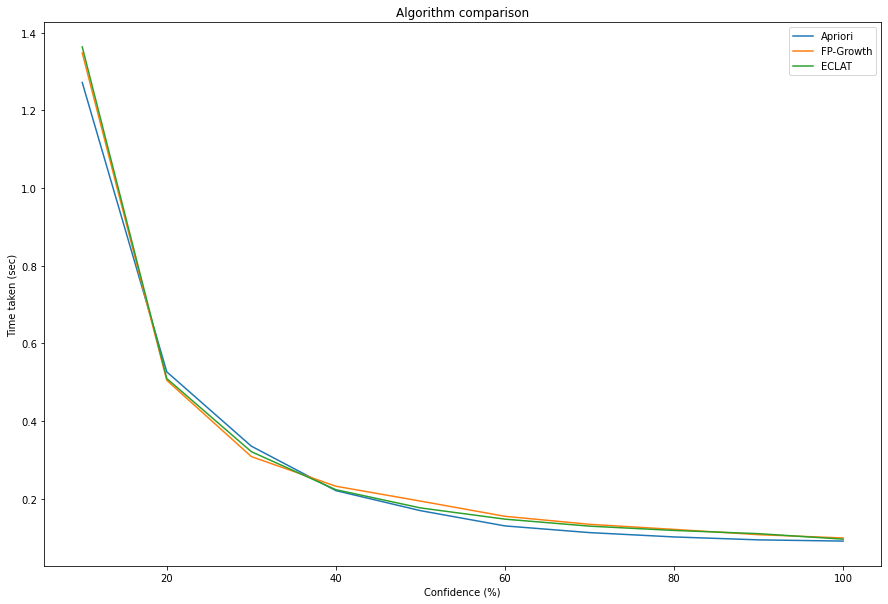

In [22]:
plt.plot(confs, a, label = "Apriori")
plt.plot(confs, fp, label = "FP-Growth")
plt.plot(confs, e, label = "ECLAT")

plt.xlabel('Confidence (%)')
plt.ylabel('Time taken (sec)')
plt.title('Algorithm comparison')
plt.legend(loc='best')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

In [23]:
print("Apriori:    FP-Growth:   ECLAT:")
for i in range(len(a)):
    print( "{:7.2f} {:13.2f} {:8.2f}".format(a[i],fp[i],e[i]) )

Apriori:    FP-Growth:   ECLAT:
   1.27          1.35     1.36
   0.53          0.50     0.51
   0.34          0.31     0.32
   0.22          0.23     0.22
   0.17          0.19     0.18
   0.13          0.15     0.15
   0.11          0.13     0.13
   0.10          0.12     0.12
   0.09          0.11     0.11
   0.09          0.10     0.10


### 2. Общее количество найденных правил

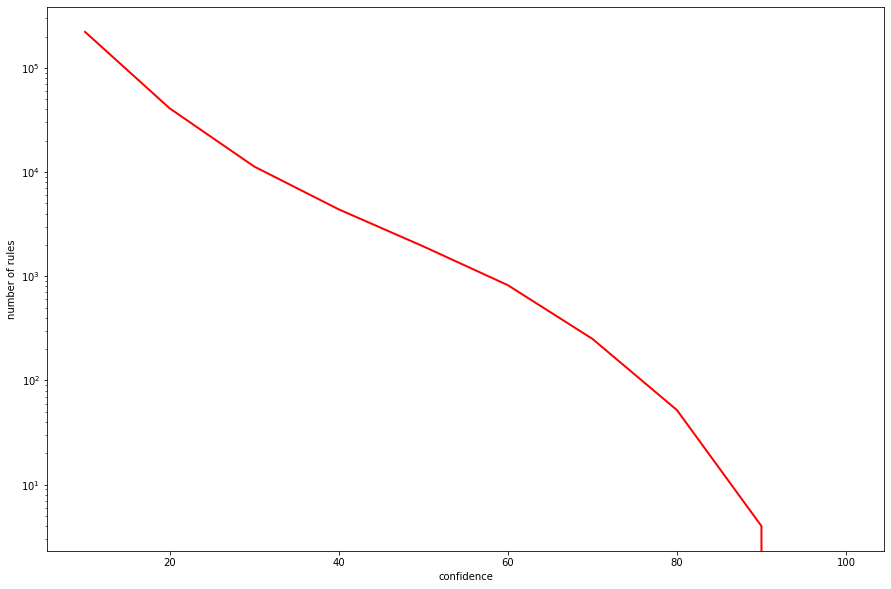

In [24]:
plt.plot(confs, fr_it_set_size, color='red', lw=2)

plt.xlabel('confidence')
plt.ylabel('number of rules')
plt.yscale('log')

fig = plt.gcf()
fig.set_size_inches(15,10)

plt.show()

In [25]:
print(confs)
print(fr_it_set_size)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[221701, 40954, 11314, 4391, 1937, 822, 251, 52, 4, 0]


### 3. Максимальное количество объектов в правиле

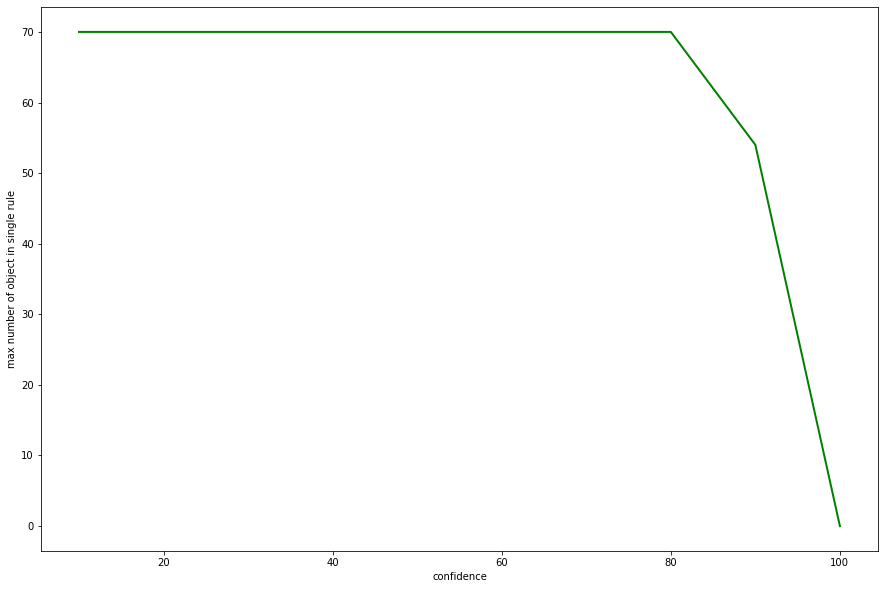

In [26]:
plt.plot(confs, fi_it_set_max_len, color='green', lw=2)

plt.xlabel('confidence')
plt.ylabel('max number of object in single rule')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

### 4. Количество правил, в которых антецедент и консеквент суммарно включают в себя не более семи объектов

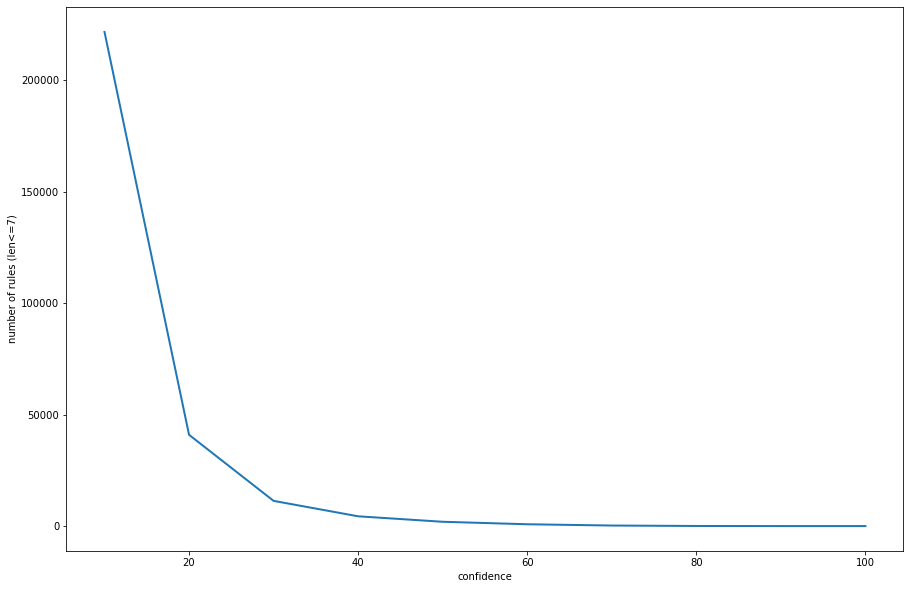

In [27]:
plt.plot(confs, num_of_unique_fr_it_set, lw=2)

plt.xlabel('confidence')
plt.ylabel('number of rules (len<=7)')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()